In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

33.04737320513719 -132.02279111340206
-85.27386467666246 45.336046532722605
-27.70394880674337 -46.50547529566788
-89.80541141467155 175.2205628254082
-9.12574366559609 8.877623117196322
-21.219781315537688 -43.33728437068021
17.343680386184744 -46.72152147858691
-32.82049968213395 116.33130405721255
40.40159277882691 37.65272560212776
89.31756657813617 -125.07872937504084
-56.18337086556004 116.82486250174816
83.70866765427792 -165.745620017757
5.19430706166807 150.1152893014845
63.66421777496734 97.98353961198012
0.3081496700139468 -164.56166790065816
-83.91437273855608 -60.08014430441649
14.453030816970795 52.77316254950142
-57.24168450957624 169.70142437604727
33.86738924576582 -69.15123482936538
65.43001096127085 -45.31713587821537
20.71221734812036 -1.4478544801672797
-30.043629698317204 149.29346421130742
-44.18103701965503 85.81732867357164
5.8509937103301155 -74.98422247031944
29.026200515406572 -112.04321605588319
29.206893731137058 -32.282283780089756
56.76977477189399 -124.

66.29463397470991 -98.0711557639461
-87.02759978582631 -7.3338899450482415
47.889899794792086 -172.5230228828659
-88.8884661561707 33.93254856916508
19.38344806914985 -110.59061264694714
-41.642037638808794 87.87617831305693
-65.6831128153355 -172.1861379298599
1.6421633009179004 139.21988531011897
-80.17583238361615 56.486898849659525
71.83343796689988 32.54772876500374
-68.77668964417327 -147.40011638890238
-51.197525320946234 106.53684346314748
-59.654176327269106 43.083222739310514
53.32012132481523 -70.3605442184411
55.220877692822 -161.7309299780448
9.60203928450872 170.4135339584489
-16.59527631058431 -108.72732296542998
45.89605097187888 1.191371123639101
-78.98428446421745 -155.1979545267256
25.502132074908317 154.79437376728055
6.494134376750949 78.64462182179938
5.6346208742017865 -30.540461954753937
56.497186245341055 -179.89284434148314
-24.77123638728378 -14.081080996743907
-50.25805254126921 -116.76483485717091
62.20297526590099 9.049093163520041
21.209321934158524 -146.

52.07351808230726 10.660111336587534
-35.113001112416555 36.621116284777884
-64.52408266982403 76.77652490759385
13.845563333788334 116.88278933598775
48.27002683891004 112.28973726638753
-69.83220414613719 -179.48482726115682
-82.12518968334479 21.172739583756567
12.143360438325175 42.95460641970675
19.154265901838116 -89.99904074461072
-21.61281124066582 -143.2132995563038
-76.10163629912472 -176.20755028232347
-68.97030923202067 111.11187358184407
55.27448740369772 -119.76840321990623
-19.292175336134733 165.65800461020916
79.26665105874687 -107.8679060237269
-84.25788690886978 -68.49162551845981
-25.926528257404087 107.39093244517443
79.46958596741771 124.58753382757209
9.51004854263121 -8.68636262086244
13.168845327627494 82.01452712106192
-58.808134375485466 -5.850766590788993
36.82545625644525 -96.33879238672978
-69.04896175363442 -171.31236961088533
-24.129370949164212 -10.179268273955415
-48.47464246813827 -38.23091073908975
5.316968964522417 -41.858132798275165
79.09905345477

In [5]:
from citipy import citipy

In [6]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)       

605

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
 # Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | half moon bay
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | florianopolis
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | luanda
Processing Record 6 of Set 1 | rio pomba
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | collie
Processing Record 9 of Set 1 | golkoy
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | tessalit
Processing Record 21 of Set 1 | narrabri
Processing Record 22 of Set 1 | busselton
Processing Record

Processing Record 34 of Set 4 | kinglassie
Processing Record 35 of Set 4 | namibe
Processing Record 36 of Set 4 | maceio
Processing Record 37 of Set 4 | murray bridge
Processing Record 38 of Set 4 | cornelio procopio
Processing Record 39 of Set 4 | jizan
Processing Record 40 of Set 4 | kindersley
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | abha
Processing Record 45 of Set 4 | saint-pacome
City not found. Skipping...
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | erzin
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | manokwari
Processing Record 1 of Set 5 | guelengdeng
City not found. Skipping...
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | adre
Processing Record 4 of Set 5 | tynda
Processing Record 5 of Set 5 | salinopolis
Processing Record 6 of Set 5 | hobart
Process

Processing Record 26 of Set 8 | amstetten
Processing Record 27 of Set 8 | menomonie
Processing Record 28 of Set 8 | victoria
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | alta floresta
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | ushtobe
Processing Record 33 of Set 8 | cocal
Processing Record 34 of Set 8 | barawe
City not found. Skipping...
Processing Record 35 of Set 8 | russell
Processing Record 36 of Set 8 | eureka
Processing Record 37 of Set 8 | mineros
Processing Record 38 of Set 8 | wilmington
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | santander
Processing Record 42 of Set 8 | manzil jamil
City not found. Skipping...
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | yabrud
Processing Record 45 of Set 8 | kincardine
Processing Record 46 of Set 8 | amapa
Processing Record 47 of Se

Processing Record 8 of Set 12 | kattivakkam
Processing Record 9 of Set 12 | bartlesville
Processing Record 10 of Set 12 | carutapera
Processing Record 11 of Set 12 | kurdzhinovo
Processing Record 12 of Set 12 | praia
Processing Record 13 of Set 12 | perth
Processing Record 14 of Set 12 | petrovsk-zabaykalskiy
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | husavik
Processing Record 17 of Set 12 | punta gorda
Processing Record 18 of Set 12 | belmonte
Processing Record 19 of Set 12 | kaeo
Processing Record 20 of Set 12 | novosineglazovskiy
Processing Record 21 of Set 12 | haverfordwest
Processing Record 22 of Set 12 | conceicao do araguaia
Processing Record 23 of Set 12 | baruun-urt
Processing Record 24 of Set 12 | borogontsy
Processing Record 25 of Set 12 | afgoye
City not found. Skipping...
Processing Record 26 of Set 12 | laizhou
Processing Record 27 of Set 12 | maragogi
Processing Record 28 of Set 12 | genhe
Processing Record 29 of Set 12 | tapes
Processing R

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Half Moon Bay,37.4636,-122.4286,99.88,14,0,19.57,US,2022-06-22 02:29:10
1,Port Alfred,-33.5906,26.8910,64.06,86,100,15.37,ZA,2022-06-22 02:33:56
2,Florianopolis,-27.6146,-48.5012,65.35,98,75,6.91,BR,2022-06-22 02:31:36
3,Bluff,-46.6000,168.3333,48.79,73,3,4.07,NZ,2022-06-22 02:33:57
4,Luanda,-8.8368,13.2343,68.00,83,75,4.61,AO,2022-06-22 02:33:57
...,...,...,...,...,...,...,...,...,...
542,Severo-Yeniseyskiy,60.3725,93.0408,71.89,29,0,6.46,RU,2022-06-22 02:48:54
543,Asuncion,-25.3007,-57.6359,71.04,88,75,13.80,PY,2022-06-22 02:44:11
544,Kununurra,-15.7667,128.7333,84.18,21,0,18.41,AU,2022-06-22 02:48:54
545,Vrangel,42.7297,133.0839,60.51,99,100,11.48,RU,2022-06-22 02:48:55


In [12]:
new_column_order = ["City", "Country", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,37.4636,-122.4286,99.88,14,0,19.57
1,Port Alfred,ZA,-33.5906,26.8910,64.06,86,100,15.37
2,Florianopolis,BR,-27.6146,-48.5012,65.35,98,75,6.91
3,Bluff,NZ,-46.6000,168.3333,48.79,73,3,4.07
4,Luanda,AO,-8.8368,13.2343,68.00,83,75,4.61
...,...,...,...,...,...,...,...,...
542,Severo-Yeniseyskiy,RU,60.3725,93.0408,71.89,29,0,6.46
543,Asuncion,PY,-25.3007,-57.6359,71.04,88,75,13.80
544,Kununurra,AU,-15.7667,128.7333,84.18,21,0,18.41
545,Vrangel,RU,42.7297,133.0839,60.51,99,100,11.48


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

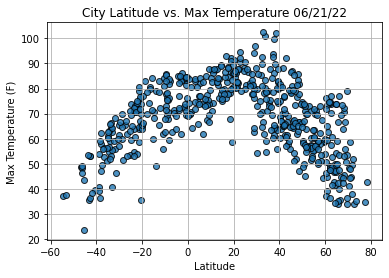

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

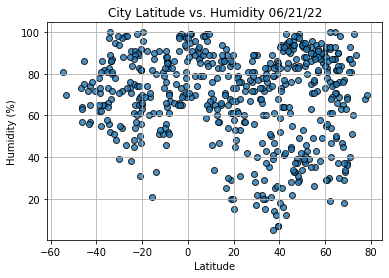

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

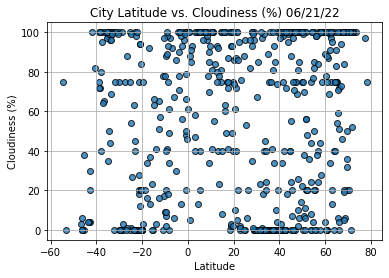

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

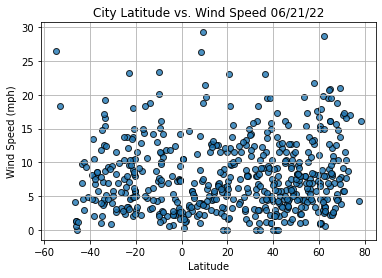

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    

In [21]:
index13= city_data_df.loc[13]
index13

City             Tura
Country            IN
Lat           25.5198
Lng           90.2201
Max Temp        81.43
Humidity           74
Cloudiness         53
Wind Speed       4.09
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
542     True
543    False
544    False
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,37.4636,-122.4286,99.88,14,0,19.57
6,Bathsheba,BB,13.2167,-59.5167,81.21,83,40,12.66
8,Golkoy,TR,40.6875,37.6178,63.81,94,99,2.98
9,Tuktoyaktuk,CA,69.4541,-133.0374,53.60,37,20,13.80
10,Albany,US,42.6001,-73.9662,61.66,92,100,1.99
...,...,...,...,...,...,...,...,...
540,Zafarabad,IN,25.7000,82.7333,87.82,42,6,7.54
541,Damietta,EG,31.4165,31.8133,75.09,73,0,15.88
542,Severo-Yeniseyskiy,RU,60.3725,93.0408,71.89,29,0,6.46
545,Vrangel,RU,42.7297,133.0839,60.51,99,100,11.48


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,37.4636,-122.4286,99.88,14,0,19.57
6,Bathsheba,BB,13.2167,-59.5167,81.21,83,40,12.66
8,Golkoy,TR,40.6875,37.6178,63.81,94,99,2.98
9,Tuktoyaktuk,CA,69.4541,-133.0374,53.60,37,20,13.80
10,Albany,US,42.6001,-73.9662,61.66,92,100,1.99


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

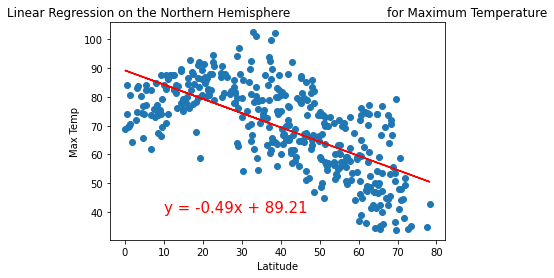

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

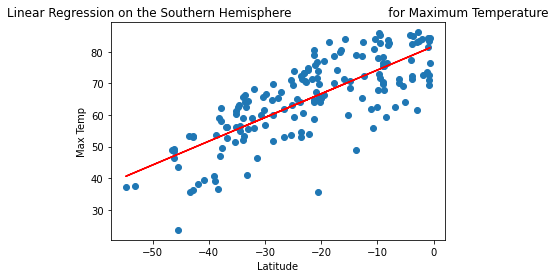

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

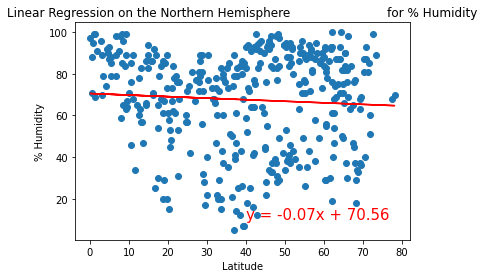

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

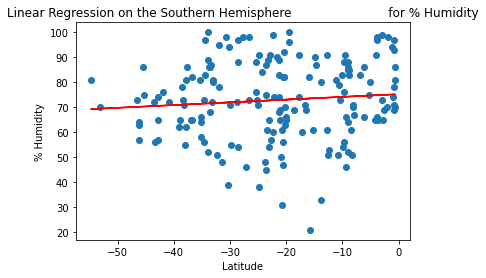

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

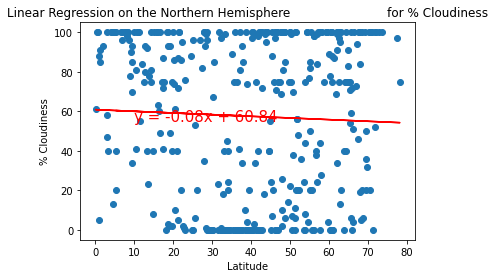

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

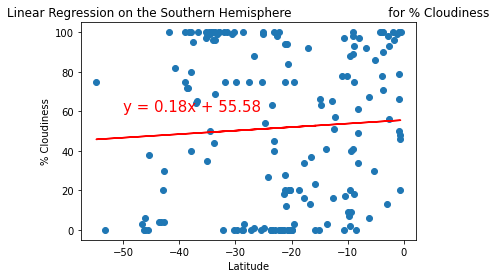

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

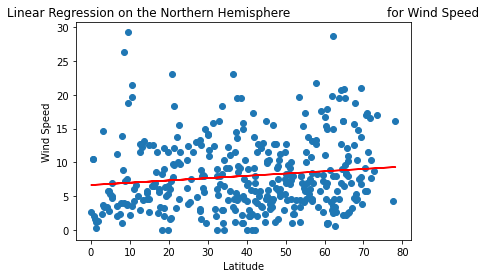

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

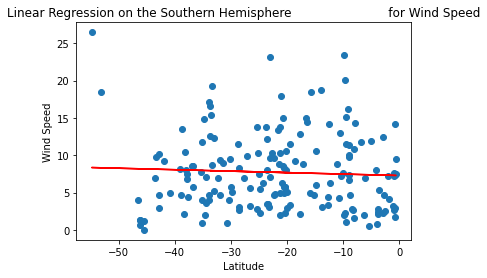

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [34]:
!pip install gmaps